<h1 style = " text-align:center; font-family:courier; font-size:300%; border: 1px solid; padding: 40px;" >
    <em>England Weather Data Analysis</em>
</h1>

<hr />

<h4 style = " font-family:courier; " >
    <p>In this notebook we are going to analyze England weather data and see if is there any pattern in it or any relationship between its data</p>
</h4>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#reading dataset
data = pd.read_csv('/kaggle/input/englandweather20062016-preprocessing/EnglandWeather.csv')
df = pd.DataFrame(data)

In [3]:
#some dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Formatted Date        96453 non-null  object 
 1   Summary               96453 non-null  object 
 2   Precip Type           95936 non-null  object 
 3   Temperature (C)       96453 non-null  float64
 4   Wind Speed (km/h)     96453 non-null  float64
 5   Pressure (millibars)  96453 non-null  float64
 6   Humidity              96453 non-null  float64
dtypes: float64(4), object(3)
memory usage: 5.2+ MB


In [4]:
#numericall columns describe
df.describe()

,Temperature (C),Wind Speed (km/h),Pressure (millibars),Humidity
count,96453.000000,96453.000000,96453.000000,96453.000000
mean,11.932678,10.810640,1003.235956,0.734899
std,9.551546,6.913571,116.969906,0.195473
min,-21.822222,0.000000,0.000000,0.000000
25%,4.688889,5.828200,1011.900000,0.600000
50%,12.000000,9.965900,1016.450000,0.780000
75%,18.838889,14.135800,1021.090000,0.890000
max,39.905556,63.852600,1046.380000,1.000000


In [5]:
#none numericall columns describe
df[['Summary','Precip Type']].describe()

,Summary,Precip Type
count,96453,95936
unique,27,2
top,Partly Cloudy,rain
freq,31733,85224


In [6]:
#slice of dataset
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Wind Speed (km/h),Pressure (millibars),Humidity
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,14.1197,1015.13,0.89
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,14.2646,1015.63,0.86
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,3.9284,1015.94,0.89
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,14.1036,1016.41,0.83
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,11.0446,1016.51,0.83


In [7]:
# nan values in each column
df.isna().sum()

Formatted Date            0
Summary                   0
Precip Type             517
Temperature (C)           0
Wind Speed (km/h)         0
Pressure (millibars)      0
Humidity                  0
dtype: int64

<hr/>

<h4 style = " font-family:courier; " >
    <p>In above codes we used some primitive methods to check and see data count , data type , nan values and some other information about data we have</p>
</h4>

<h4 style = " font-family:courier; " >
<p><ol type="1">There are some problems that must solve before going to plot the data<li>First let's drop missing values because there are few of them, we can fill them with other methods later for further use.</li><li>Second there is a column contain datetime data but its type is object we must change its type to datetime and sort data by date.</li></ol></p>
</h4>

In [8]:
#Copy the dataset to perform data transformations and analysis on the dataset and keep the original data safe
df_test_1 = df.copy()
#drop nan values
df_test_1 = df_test_1.dropna()

In [9]:
#change datetime column type from object to datetime and sort dataset by date
df_test_1['Formatted Date'] = pd.to_datetime(df_test_1['Formatted Date'],utc=True)
df_test_1 = df_test_1.sort_values('Formatted Date')
df_test_1['Formatted Date'].dtype

datetime64[ns, UTC]

In [10]:
#data types in each column
df_test_1.dtypes

Formatted Date          datetime64[ns, UTC]
Summary                              object
Precip Type                          object
Temperature (C)                     float64
Wind Speed (km/h)                   float64
Pressure (millibars)                float64
Humidity                            float64
dtype: object

In [11]:
#seperating numerical columns and categorical columns
numericall_columns = []
categorical_columns = []
for col in df_test_1.columns :
    if df_test_1[f'{col}'].dtype == 'float64' :
        numericall_columns.append(col)
    elif df_test_1[f'{col}'].dtype == 'object' and df_test_1[f'{col}'].nunique() < 30 :
        categorical_columns.append(col)
        

<Axes: >

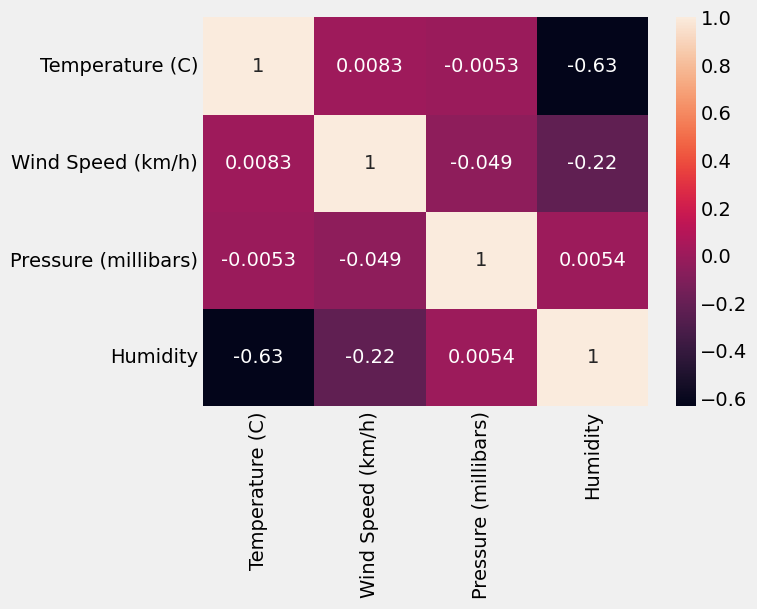

In [12]:
#correlation beatween numericall columns with heatmap
data_correlation = df_test_1[numericall_columns].corr()
plt.style.use('fivethirtyeight')
sns.heatmap(data_correlation,annot=True)

<h4 style = " font-family:courier; " >
    <p>In this heatmap chart you can see correlation between numericall columns of dataset , there is a significant correlation between Humidity and Temperature , also a correlation between Humidity and Wind Speed</p>
</h4>

Text(0.5, 0, 'Pressure (millibars)')

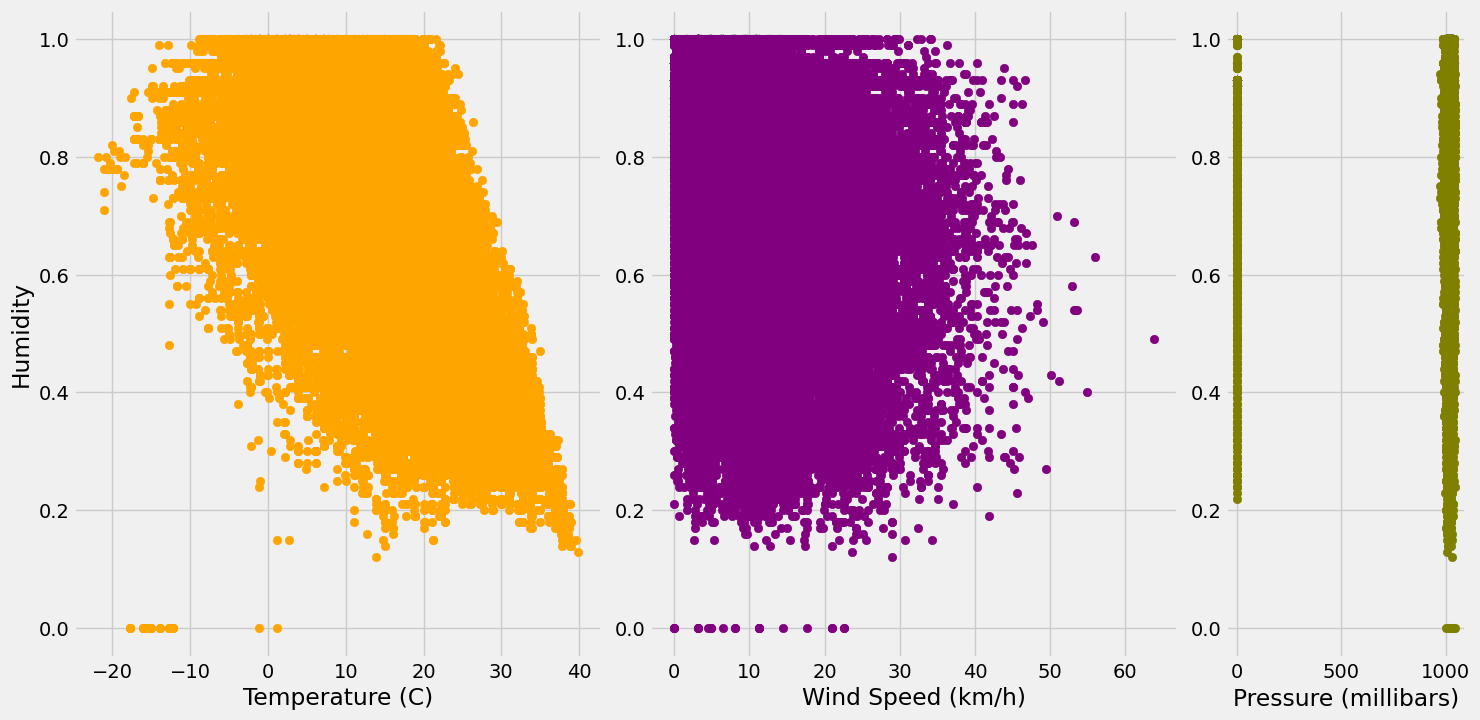

In [13]:
#scatter plot beatween 'Humidity' collumn and other numericall columns
plt.figure(figsize = (16,8))
plt.subplot(1,5,(1,2))
plt.scatter(df_test_1['Temperature (C)'],df_test_1['Humidity'],color = 'orange')
plt.xlabel('Temperature (C)')
plt.ylabel('Humidity')
plt.subplot(1,5,(3,4))
plt.scatter(df_test_1['Wind Speed (km/h)'],df_test_1['Humidity'],color = 'purple')
plt.xlabel('Wind Speed (km/h)')
plt.subplot(155)
plt.scatter(df_test_1['Pressure (millibars)'],df_test_1['Humidity'],color = 'olive')
plt.xlabel('Pressure (millibars)')

<h4 style = " font-family:courier; " >
    <p>Heatmap chart showed that there was a minus correlation between Humidity and Temperature and in scatter plot above you can see that when Temperature go up Humidity go down,same goes for Humidity and Wind Speed but with a lower slope.</p><p>Last chart show scatter plot between Humidity and Pressure and some of its data show Pressure is 0 so it must be false information and noise, so let's drop this values and plot this chart again.</p>
</h4>

<Axes: xlabel='Temperature (C)', ylabel='Humidity'>

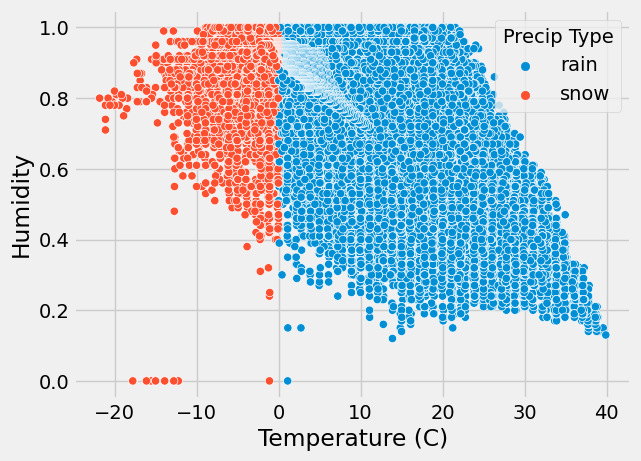

In [14]:
#scatter plot beatween 'Humidity' and 'Temperature' with 'Precip Type' as hue
sns.scatterplot(x=df_test_1['Temperature (C)'],y=df_test_1['Humidity'],hue=df_test_1['Precip Type'])

<h4 style = " font-family:courier; " >
    <p>We saw this chart before but this time it give us a better view of correlation and also it contain another column from our dataset that show us each point is rainy or snowy , as you can see points with Temperature lower than 0 are snowy and points with Tmperature greater than 0 are rainy , we can use this information later to fill missing values that was in Precip Type column</p>
</h4>

<Axes: xlabel='Pressure (millibars)', ylabel='Humidity'>

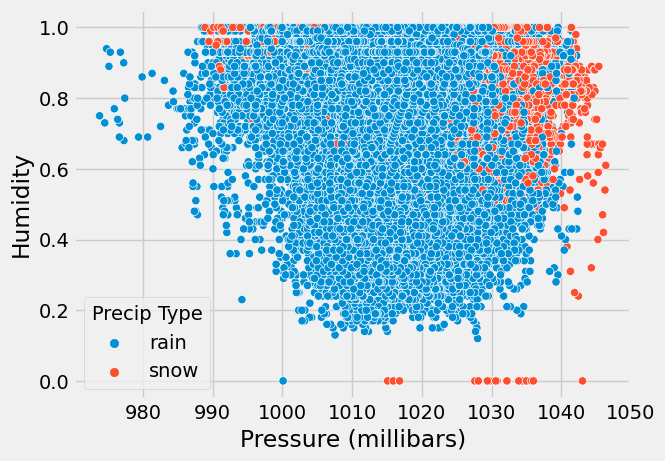

In [15]:
# scatter plot beatween 'Humidity' and 'Pressure' with non zero 'Pressure' values with 'Precip Type' as hue
df_test_2=df_test_1[df_test_1['Pressure (millibars)']>0]
sns.scatterplot(x=df_test_2['Pressure (millibars)'],y=df_test_2['Humidity'],hue=df_test_1['Precip Type'])

<h4 style = " font-family:courier; " >
    <p>This shows scatter plot between Humidity and Pressure without zero Pressure values , as you can see Pressure range is between 990 and 1040 and most of snowy points are high Pressure</p>
</h4>

<Axes: xlabel='Wind Speed (km/h)', ylabel='Humidity'>

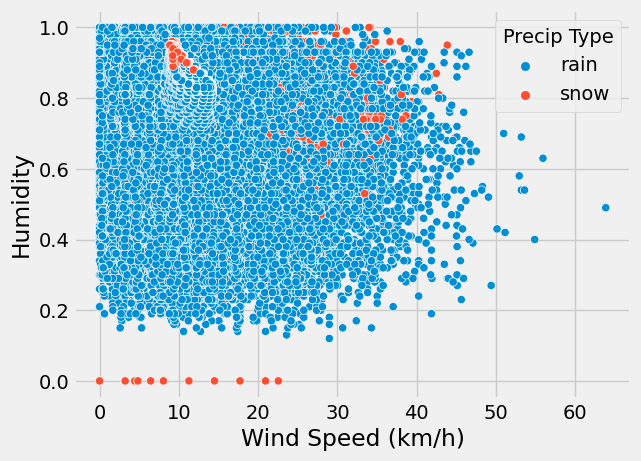

In [16]:
#scatter plot beatween 'Humidity' and 'Wind Speed' with 'Precip Type' as hue
sns.scatterplot(data=df_test_1,x='Wind Speed (km/h)',y='Humidity',hue=df_test_1['Precip Type'])

<h4 style = " font-family:courier; " >
    <p>This shows scatter plot between Humidity and Wind Speed , as you can see when Wind Speed go up Humidity go down</p>
</h4>

Text(0, 0.5, 'Weather Type')

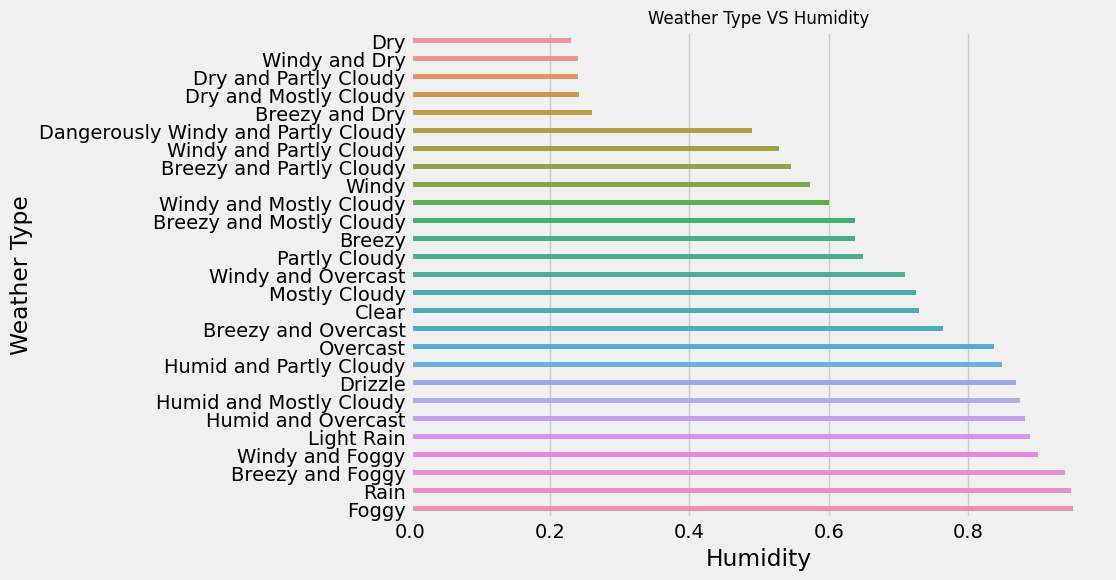

In [17]:
#average 'Humidity' in each weather type
df_humidity_weather_type = df_test_1[['Summary','Humidity']].groupby(['Summary']).mean().sort_values(by='Humidity')
plt.figure(figsize=(8,6))
sns.barplot(data=df_humidity_weather_type,y=df_humidity_weather_type.index,x='Humidity',orient='h',width=0.3)
plt.title('Weather Type VS Humidity',fontsize=12)
plt.ylabel('Weather Type')

<h4 style = " font-family:courier; " >
    <p>This chart show us average Humidity in each weather type , as you can see foggy and rainy weather types have highest Humidity and dry weather types have lowest Humidity.</p>
</h4>

Text(0, 0.5, 'Weather Type')

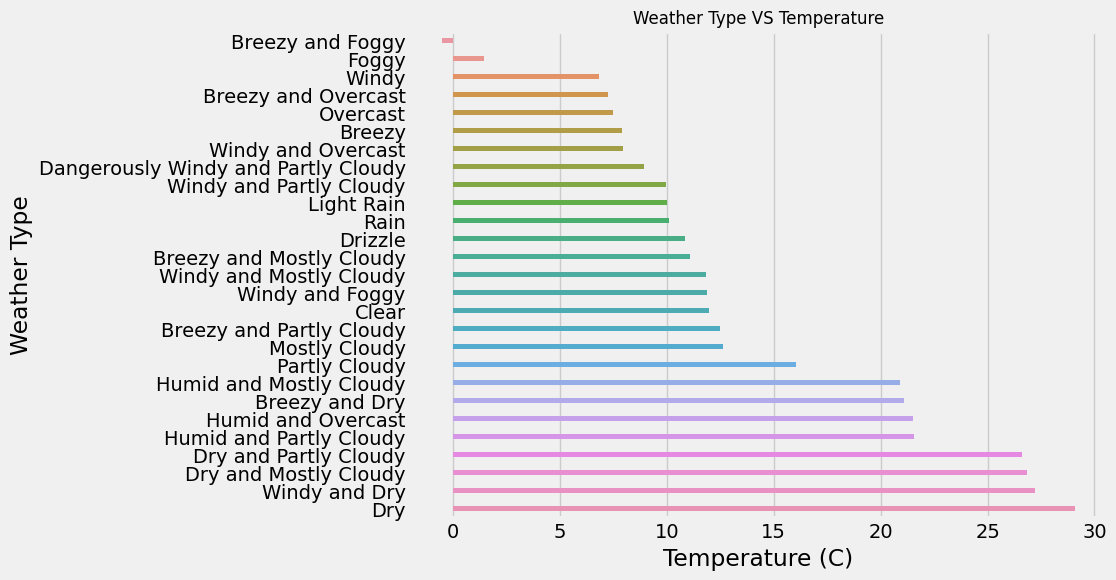

In [18]:
#average 'Temperature' in each weather type
df_temp_weather_type = df_test_1[['Summary','Temperature (C)']].groupby(['Summary']).mean().sort_values(by='Temperature (C)')
plt.figure(figsize=(8,6))
sns.barplot(data=df_temp_weather_type,y=df_temp_weather_type.index,x='Temperature (C)',orient='h',width=0.3)
plt.title('Weather Type VS Temperature',fontsize=12)
plt.ylabel('Weather Type')

<h4 style = " font-family:courier; " >
    <p>This chart show us average Temperature in each weather type , as you can see foggy and breezy weather types have lowest Temperature and dry weather types have highest Temperature .</p>
</h4>

Text(0, 0.5, 'Weather Type')

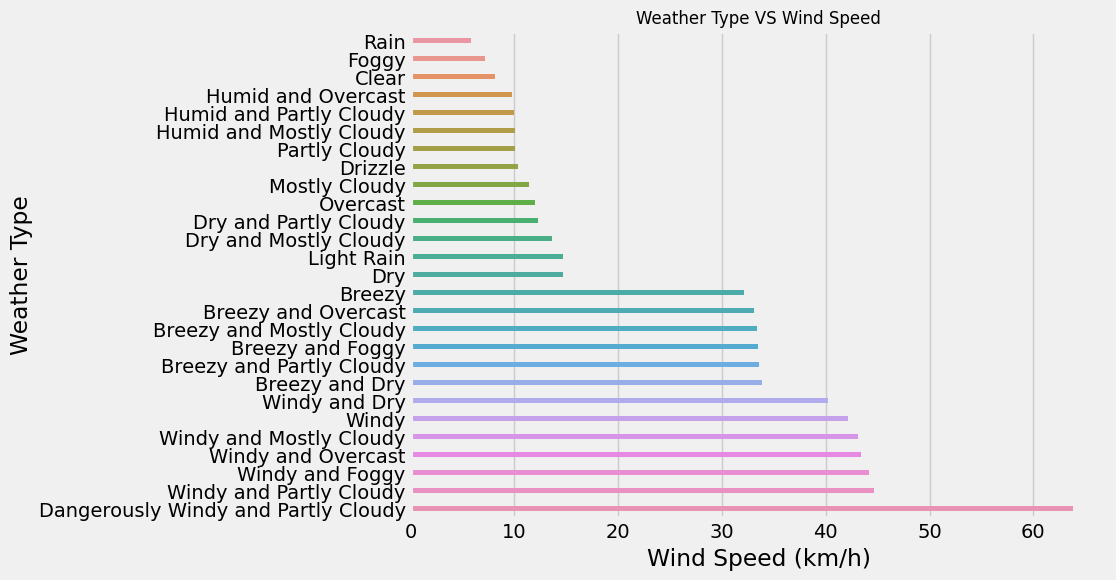

In [19]:
#average 'Wind Speed' in each weather type
df_wind_weather_type = df_test_1[['Summary','Wind Speed (km/h)']].groupby(['Summary']).mean().sort_values(by='Wind Speed (km/h)')
plt.figure(figsize=(8,6))
sns.barplot(data=df_wind_weather_type,y=df_wind_weather_type.index,x='Wind Speed (km/h)',orient='h',width=0.3)
plt.title('Weather Type VS Wind Speed',fontsize=12)
plt.ylabel('Weather Type')

<h4 style = " font-family:courier; " >
    <p>This chart show us average Wind Speed in each weather type , as you can see foggy and rainy weather types have lowest Wind Speed and windy weather types have highest Wind Speed .</p>
</h4>

In [20]:
#Extract day of month,day of year,month,year , and date from datetime column
df_test_1['day']=df_test_1['Formatted Date'].dt.day
df_test_1['dayofyear']=df_test_1['Formatted Date'].dt.dayofyear
df_test_1['month']=df_test_1['Formatted Date'].dt.month
df_test_1['year']=df_test_1['Formatted Date'].dt.year
df_test_1['date']=df_test_1['Formatted Date'].dt.date
# Remove UTC from datetime column and set datetime column as index
df_test_1['Formatted Date'] = df_test_1['Formatted Date'].dt.tz_localize(None)
df_test_1.set_index('Formatted Date',inplace = True)

In [21]:
#replace months number with their name in month column
month_dict = {
    1:'january',
    2:'february',
    3:'march',
    4:'april',
    5:'may',
    6:'june',
    7:'july',
    8:'august',
    9:'september',
    10:'october',
    11:'november',
    12:'december'}
df_test_1['month']=df_test_1['month'].map(month_dict)

In [22]:
#average humidity per month
month_avg_humidity = df_test_1.groupby('month')['Humidity'].mean()
df_test_1['avg_humidity_month'] = df_test_1['month'].map(month_avg_humidity)

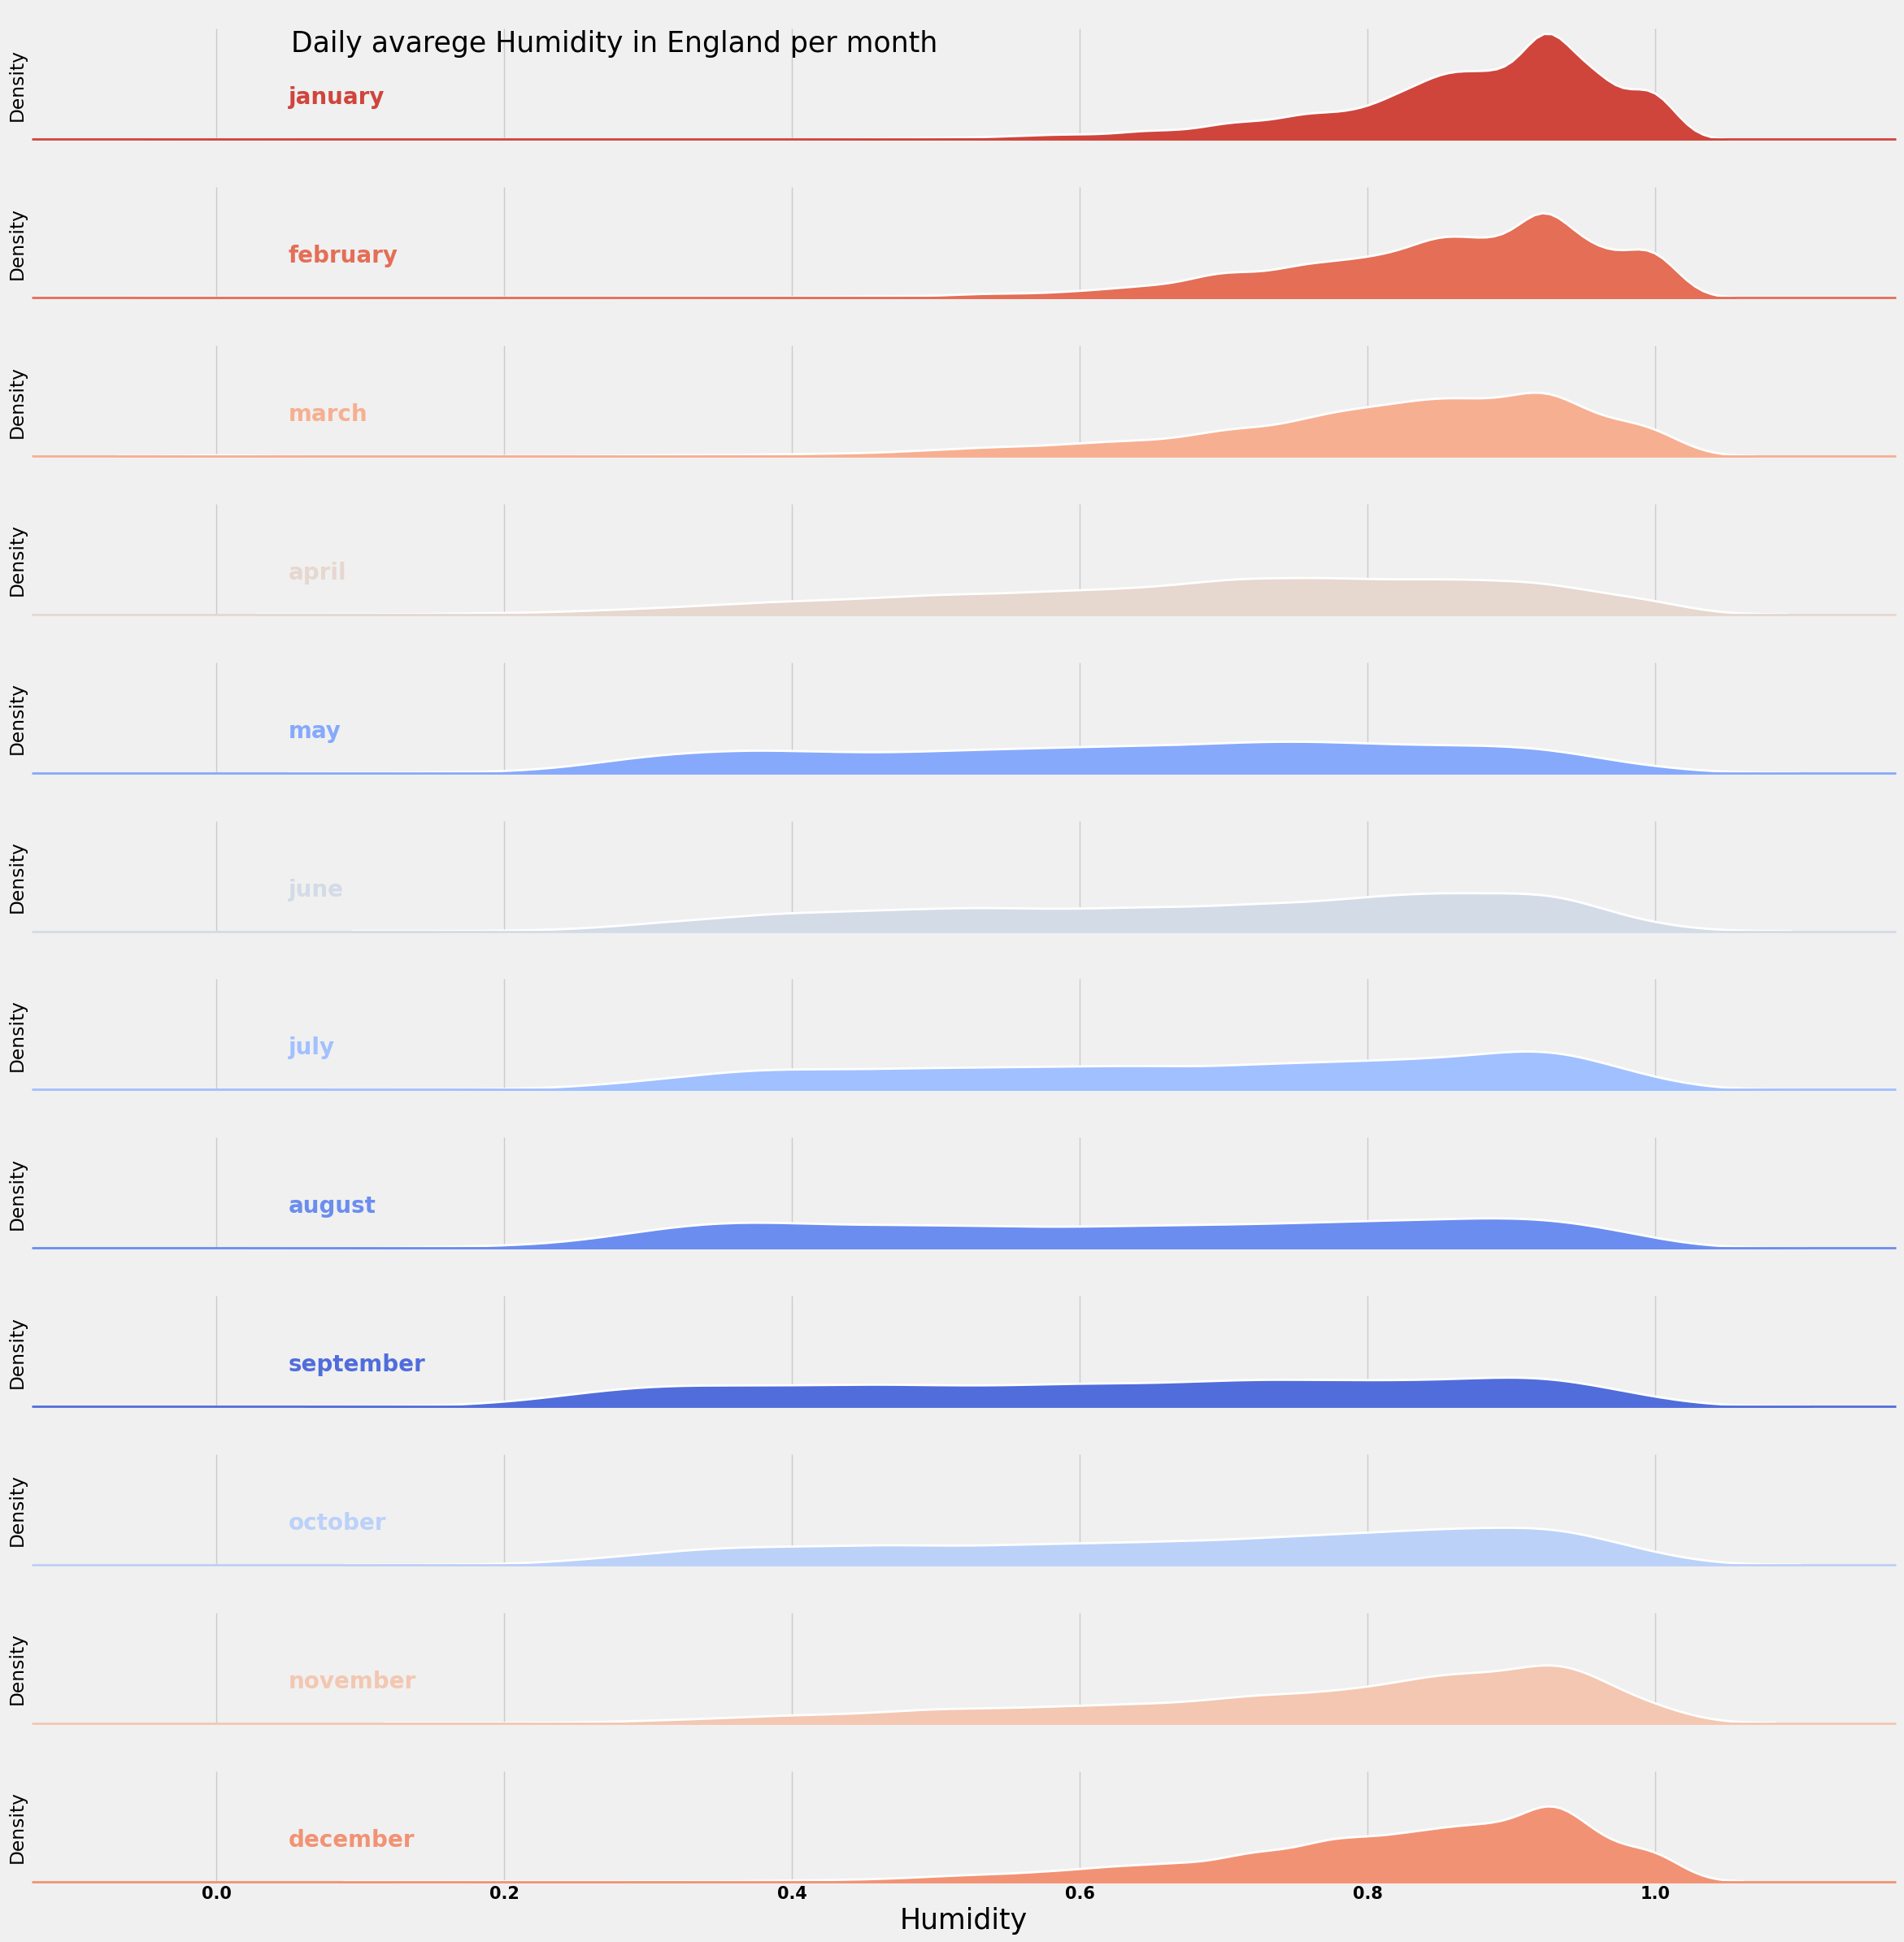

In [23]:
# average humidity per month plot
pal=sns.color_palette(palette='coolwarm',n_colors=12)
g=sns.FacetGrid(df_test_1,row='month',hue='avg_humidity_month',aspect=12,height=2,palette=pal)
g.map(sns.kdeplot,'Humidity',bw_adjust=1,clip_on=False,fill=True,alpha=1,linewidth=1.5)
g.map(sns.kdeplot,'Humidity',bw_adjust=1,clip_on=False,color='w',lw=2)
g.map(plt.axhline,y=0,lw=2,clip_on=False)

for i,ax in enumerate(g.axes.flat):
    ax.text(0.05,2,month_dict[i+1],
           fontweight='bold',fontsize=20,
           color=ax.lines[-1].get_color())

g.set_titles(" ")
g.set(yticks=[ ])
g.despine(bottom=True,left=True)
plt.setp(ax.get_xticklabels(),fontsize=15,fontweight='bold')
plt.xlabel('Humidity',fontsize=25)
g.fig.suptitle('Daily avarege Humidity in England per month',
               ha='right',
              fontsize=25,
              fontweight=20)
plt.show()

<h4 style = " font-family:courier; " >
    <p>In this chart you can see average Humidity range in every month , as you can see first and last months of year has higher Humidity and january had highest.</p>
</h4>

In [24]:
#average temperature per month
month_avg_temperature = df_test_1.groupby('month')['Temperature (C)'].mean()
df_test_1['avg_temperature_month'] = df_test_1['month'].map(month_avg_temperature)

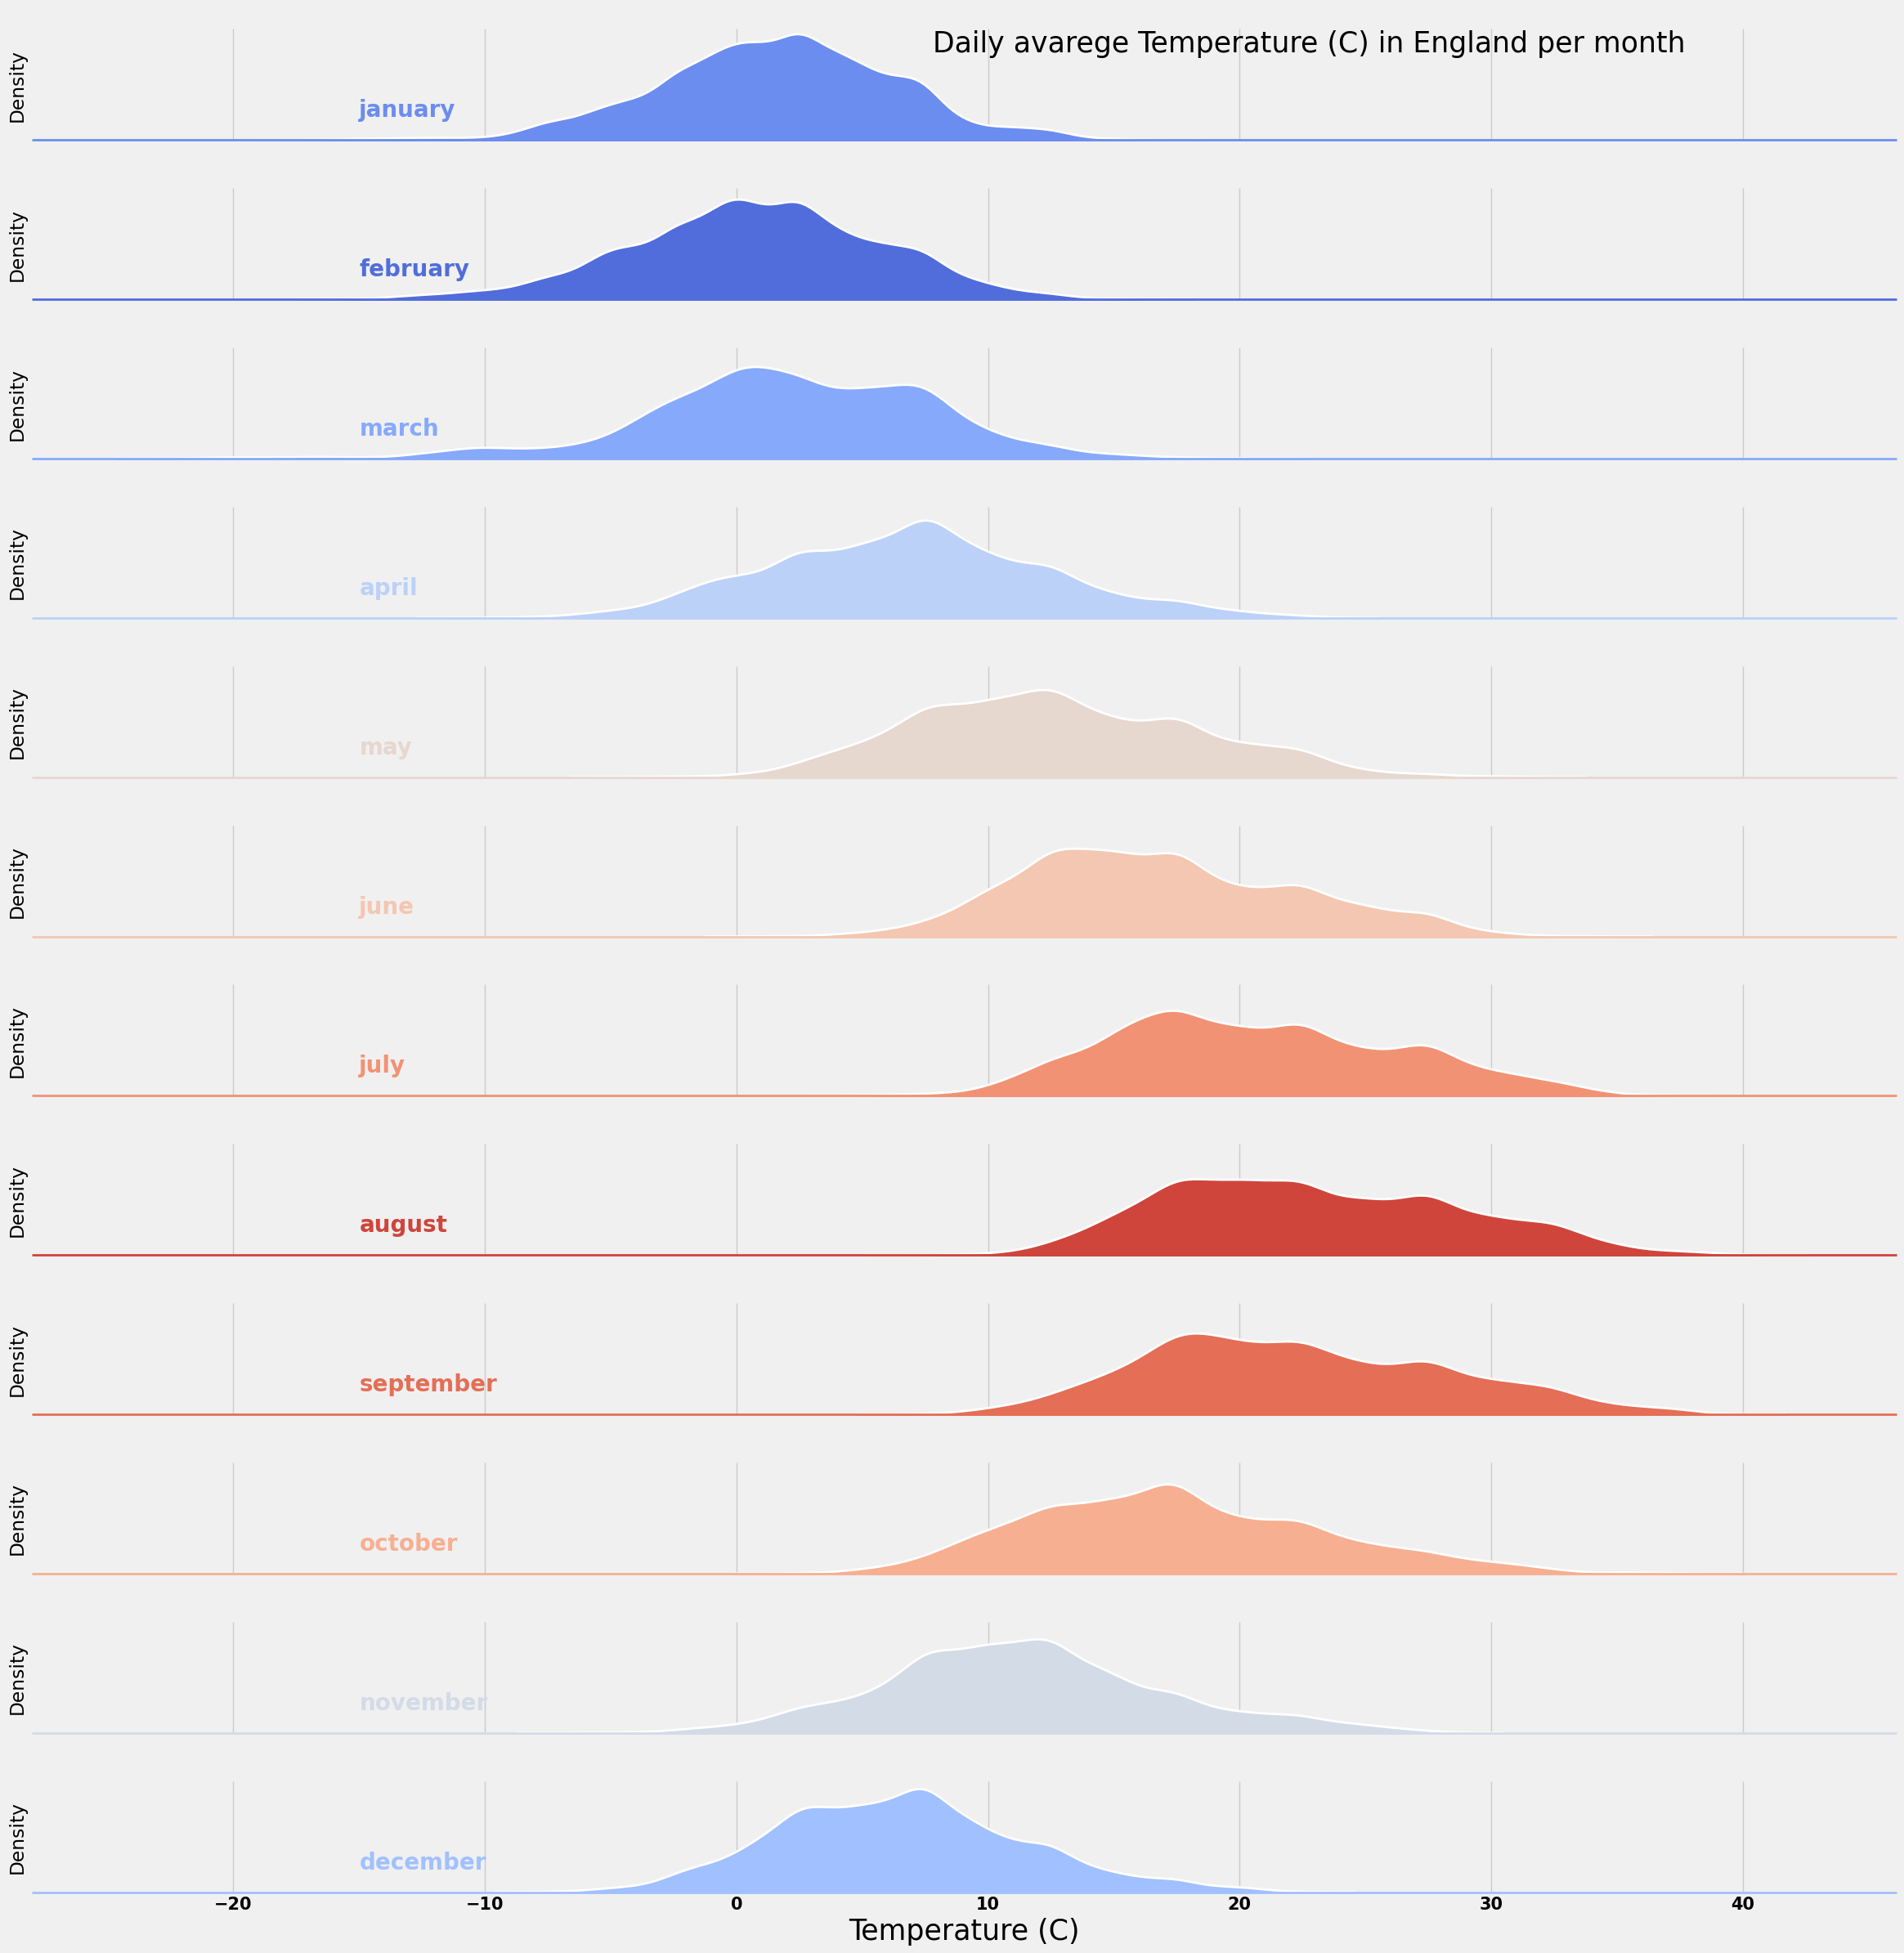

In [25]:
#average temperature per month plot
pal=sns.color_palette(palette='coolwarm',n_colors=12)
g=sns.FacetGrid(df_test_1,row='month',hue='avg_temperature_month',aspect=12,height=2,palette=pal)
g.map(sns.kdeplot,'Temperature (C)',bw_adjust=1,clip_on=False,fill=True,alpha=1,linewidth=1.5)
g.map(sns.kdeplot,'Temperature (C)',bw_adjust=1,clip_on=False,color='w',lw=2)
g.map(plt.axhline,y=0,lw=2,clip_on=False)

for i,ax in enumerate(g.axes.flat):
    ax.text(-15,0.02,month_dict[i+1],
           fontweight='bold',fontsize=20,
           color=ax.lines[-1].get_color())
#g.fig.subplots_adjust(hspace=-0.3)
g.set_titles(" ")
g.set(yticks=[ ])
g.despine(bottom=True,left=True)
plt.setp(ax.get_xticklabels(),fontsize=15,fontweight='bold')
plt.xlabel('Temperature (C)',fontsize=25)
g.fig.suptitle('Daily avarege Temperature (C) in England per month',
               ha='left',
              fontsize=25,
              fontweight=20)
plt.show()

<h4 style = " font-family:courier; " >
    <p>In this chart you can see average Temperature range in every month , as you can see first and last months of year has lower Temperature and middle year months has higher Temperature .</p>
</h4>

In [26]:
#daily average humidity
daily_humidity = df_test_1.groupby('date')['Humidity'].mean()

In [27]:
#periodogram function to plot a periodogram that shows possible patterns
def plot_periodogram(ts, detrend='linear', ax=None):
    from scipy.signal import periodogram
    fs = pd.Timedelta("365D") / pd.Timedelta("1D")
    freqencies, spectrum = periodogram(
        ts,
        fs=fs,
        detrend=detrend,
        window="boxcar",
        scaling='spectrum',
    )
    if ax is None:
        _ , ax = plt.subplots()
    ax.step(freqencies, spectrum, color="purple")
    ax.set_xscale("log")
    ax.set_xticks([1, 2, 4, 6, 12, 26, 52, 104])
    ax.set_xticklabels(
        [
            "Annual (1)",
            "Semiannual (2)",
            "Quarterly (4)",
            "Bimonthly (6)",
            "Monthly (12)",
            "Biweekly (26)",
            "Weekly (52)",
            "Semiweekly (104)",
        ],
        rotation=90,
    )
    ax.ticklabel_format(axis="y", style="sci", scilimits=(0, 0))
    ax.set_ylabel("Variance")
    ax.set_title("Periodogram")
    return ax

<Axes: title={'center': 'Periodogram'}, ylabel='Variance'>

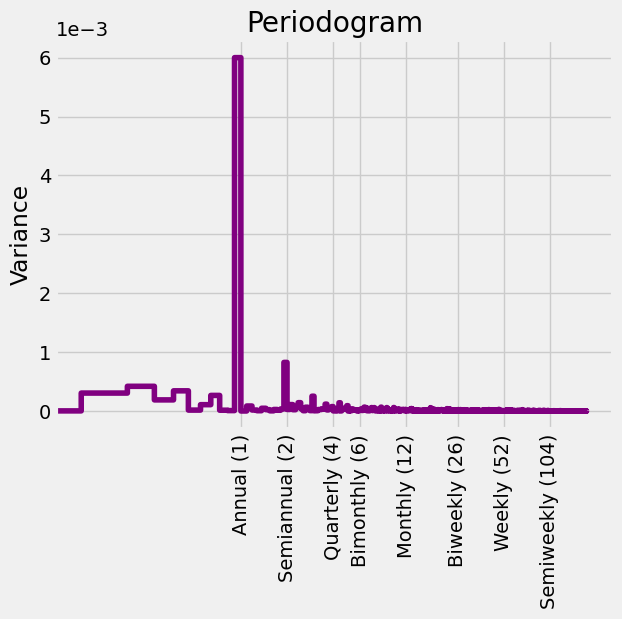

In [28]:
plot_periodogram(daily_humidity)

<h4 style = " font-family:courier; " >
    <p>This periodogram chart show us if there is any pattern in different time ranges for our data , as it shows there is an strong pattern in annual Humidity . In next chart we are going to see this pattern .</p>
</h4>

In [29]:
#seasonal function to plot seasonal patterns
def seasonal_plot(X, y, period, freq, ax=None):
    if ax is None:
        _, ax = plt.subplots()
    palette = sns.color_palette("husl", n_colors=X[period].nunique(),)
    ax = sns.lineplot(
        x=freq,
        y=y,
        hue=period,
        data=X,
        ax=ax,
        palette=palette,
        legend=False,
        size = 0.5
    )
    ax.set_title(f"Seasonal Plot ({period}/{freq})")
    for line, name in zip(ax.lines, X[period].unique()):
        y_ = line.get_ydata()[-1]
        ax.annotate(
            name,
            xy=(1, y_),
            xytext=(6, 0),
            color=line.get_color(),
            xycoords=ax.get_yaxis_transform(),
            textcoords="offset points",
            size=14,
            va="center",
        )
    return ax


<Axes: title={'center': 'Seasonal Plot (year/dayofyear)'}, xlabel='dayofyear', ylabel='Humidity'>

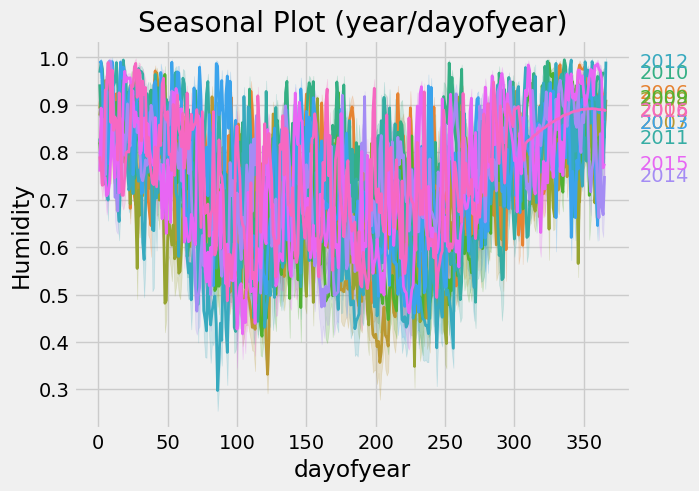

In [30]:
#annual humidity pattern
seasonal_plot(df_test_1, y="Humidity", period="year", freq="dayofyear")

<h4 style = " font-family:courier; " >
    <p>As you can see Humidity pattern in each year almost is same as other years .</p>
</h4>

In [31]:
#daily average temperature
daily_temperature = df_test_1.groupby('date')['Temperature (C)'].mean()

<Axes: title={'center': 'Periodogram'}, ylabel='Variance'>

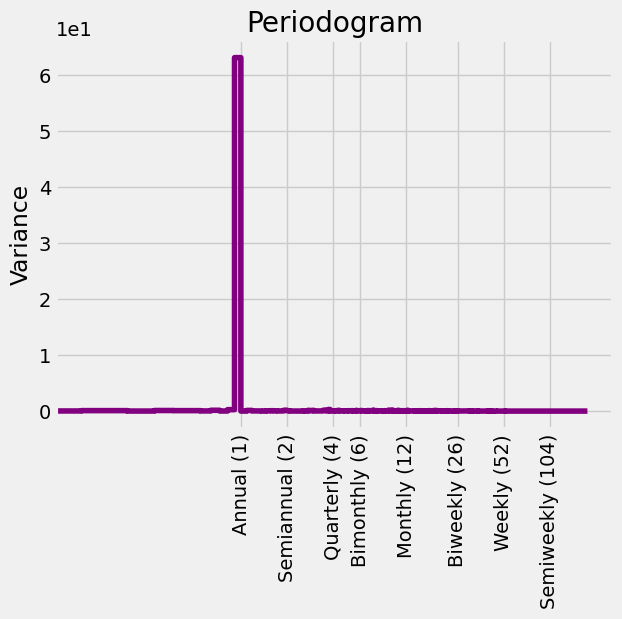

In [32]:
plot_periodogram(daily_temperature)

<h4 style = " font-family:courier; " >
    <p>As this periodogram chart shows there is an strong pattern in annual Temperature . In next chart we are going to see this pattern .</p>
</h4>

<Axes: title={'center': 'Seasonal Plot (year/dayofyear)'}, xlabel='dayofyear', ylabel='Temperature (C)'>

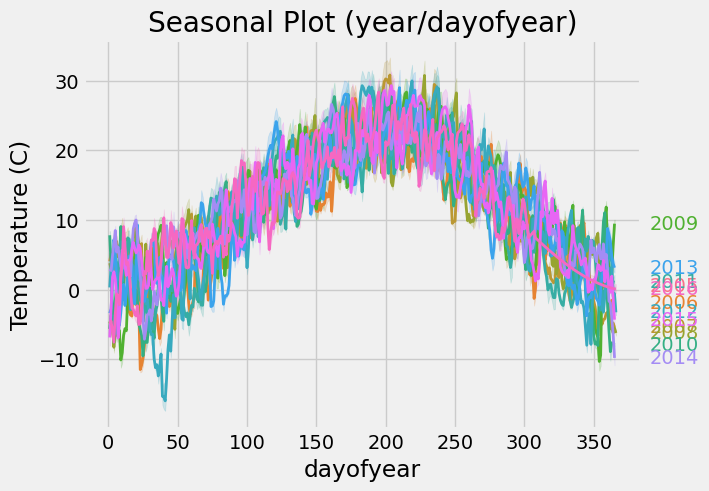

In [33]:
#annual temperature pattern
seasonal_plot(df_test_1, y='Temperature (C)', period="year", freq="dayofyear")

<h4 style = " font-family:courier; " >
    <p>As you can see Temperature pattern in each year almost is same as other years .</p>
</h4>